# SEFA

## Test Capture

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEXMEGA'
CRYPTO_TARGET = 'NONE'

In [2]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../hardware/victims/firmware/simpleserial-Navid
make PLATFORM=$1 CRYPTO_TARGET=$2

Building for platform CWLITEXMEGA with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-Navid-CWLITEXMEGA.hex
rm -f -- simpleserial-Navid-CWLITEXMEGA.eep
rm -f -- simpleserial-Navid-CWLITEXMEGA.cof
rm -f -- simpleserial-Navid-CWLITEXMEGA.elf
rm -f -- simpleserial-Navid-CWLITEXMEGA.map
rm -f -- simpleserial-Navid-CWLITEXMEGA.sym
rm -f -- simpleserial-Navid-CWLITEXMEGA.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-Navid.s simpleserial.s XMEGA_AES_driver.s uart.s usart_driver.s xmega_hal.s
rm -f -- simpleserial-Navid.d simpleserial.d XMEGA_AES_driver.d uart.d usart_driver.d xmega_hal.d
rm -f -- simpleserial-Navid.i simpleserial.i XMEGA_AES_driver.i uart.i usart_driver.i xmega_hal.i
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 10.1.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR P

.././simpleserial/simpleserial.c:18: warning: "CRC" redefined
   18 | #define CRC 0xA6
      | 
In file included from c:\users\admin\chipwh~1\cw\home\portable\avrgcc\avr-gcc-10.1.0-x64-windows\avr\include\avr\io.h:552,
                 from .././hal/hal.h:93,
                 from .././simpleserial/simpleserial.c:5:
c:\users\admin\chipwh~1\cw\home\portable\avrgcc\avr-gcc-10.1.0-x64-windows\avr\include\avr\iox128d3.h:2239: note: this is the location of the previous definition
 2239 | #define CRC    (*(CRC_t *) 0x00D0)  /* Cyclic Redundancy Checker */
      | 


In [3]:
%run "Setup_Scripts/Setup_Generic.ipynb"

(ChipWhisperer NAEUSB WARNING|File naeusb.py:701) Your firmware (0.11) is outdated - latest is 0.62See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍


In [4]:
fw_path = '../hardware/victims/firmware/simpleserial-Navid/simpleserial-Navid-{}.hex'.format(PLATFORM)
cw.program_target(scope, prog, fw_path)

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 2383 bytes


In [5]:
scope.clock.adc_src = "clkgen_x1"
scope.io.hs2 = "clkgen"
scope.adc.timeout = 0.1

ktp = cw.ktp.Basic()
key, text = ktp.next()

trace = cw.capture_trace(scope, target, text,key)
# scope.adc.samples = 20000

# ciphertext = trace.textout
# sbox_in = text
# sbox_out = ciphertext

# ktp.fixed_text = True
# ktp.fixed_key = True
# key, text = ktp.next()
# trace = cw.capture_trace(scope, target, text, key)
# goldciph = trace.textout
# print(goldciph)
# cw.plot(trace[0])

In [8]:
# print(trace)
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16,
]
import numpy as np
# S_out=np.zeros(16)
# for i in range (16):
#     S_out[i]=sbox[text[i]]
#     print(trace.textout[i])
# print(S_out)

In [93]:
import numpy as np
import time
import chipwhisperer.common.results.glitch as glitch

def reboot_flush():            
    scope.io.pdic = False
    time.sleep(0.1)
    scope.io.pdic = "high_z"
    time.sleep(0.1)
    target.flush()

# ktp = cw.ktp.Basic()
# key, text = ktp.next()

# SBOX = [
#     0, 9, 18, 11, 5, 12, 22, 15,
#     10, 3, 24, 1, 13, 4, 30, 7,
#     20, 21, 6, 23, 17, 16, 2, 19,
#     26, 27, 8, 25, 29, 28, 14, 31
# ];

gc = glitch.GlitchController(groups=["success", "reset", "normal"], parameters=["width", "offset", "ext_offset"])

gc.set_range("width", 6, 6)
gc.set_range("offset", -10, -10)
gc.set_range("ext_offset", 355, 355)#10362#10562
scope.glitch.clk_src = "clkgen" # set glitch input clock
scope.glitch.output = "clock_xor" # glitch_out = clk ^ glitch
scope.glitch.trigger_src = "ext_single" # glitch only after scope.arm() called
scope.io.hs2 = "glitch"  # output glitch_out on the clock line
scope.adc.timeout = 0.1

gc.set_global_step(1)
scope.glitch.repeat = 1
reboot_flush()

RUNS = 30000
reset_num=150

In [ ]:
data2 = np.zeros((RUNS,2))
S_out=np.zeros(16)
trace_coll=np.zeros((RUNS,5000))
gc.display_stats()
n=0
for glitch_settings in gc.glitch_values():
    scope.glitch.width = glitch_settings[0]
    scope.glitch.offset = glitch_settings[1]
    scope.glitch.ext_offset = glitch_settings[2]
    reset_cnt = 0
    valid_run = 1
    for i in range(RUNS):
        key, text = ktp.next()
        for i in range (16):
            S_out[i]=((sbox[text[i]]))
        S_out=S_out.astype(int)
        trace = cw.capture_trace(scope, target, text, key)
        if scope.adc.state:
            gc.add("reset", (scope.glitch.width, scope.glitch.offset, scope.glitch.ext_offset))
            reboot_flush()
            reset_cnt += 1
            if reset_cnt >= reset_num:
                valid_run = 0
                break
            continue

        try:
            trace = cw.capture_trace(scope, target, text, key)
        except:
            gc.add("reset", (scope.glitch.width, scope.glitch.offset, scope.glitch.ext_offset))
            reboot_flush()
            reset_cnt += 1
            if reset_cnt >= reset_num:
                valid_run = 0
                break
            continue

        if trace is None:
            gc.add("reset", (scope.glitch.width, scope.glitch.offset, scope.glitch.ext_offset))
            reboot_flush()
            reset_cnt += 1
            if reset_cnt >= reset_num:
                valid_run = 0
                break
            continue

        ciphertext = trace.textout
        if ciphertext is None:
            gc.add("reset", (scope.glitch.width, scope.glitch.offset, scope.glitch.ext_offset))
            reboot_flush()
            reset_cnt += 1
            if reset_cnt >= reset_num:
                valid_run = 0
                break
            continue


        sbox_in = text
        sbox_out = ciphertext 

        if sbox_out[0] != S_out[0]:
            gc.add("success", (scope.glitch.width, scope.glitch.offset, scope.glitch.ext_offset))
            if sbox_out[1] !=[] :#and sbox_out[1] !=0
                data2[n,:] =[sbox_out[0],S_out[0]]
#                 trace_coll[n,:] =trace[0]
                n=n+1
        else:
            gc.add("normal", (scope.glitch.width, scope.glitch.offset, scope.glitch.ext_offset))
#             data2[n,:] =[sbox_out[3],goldciph[3]]
#             n=n+1

#     if valid_run == 0:
#         data2 = np.zeros((RUNS,16),dtype=np.uint8)

IntText(value=0, description='success count:', disabled=True)

IntText(value=0, description='reset count:', disabled=True)

IntText(value=0, description='normal count:', disabled=True)

FloatSlider(value=6.0, continuous_update=False, description='width setting:', disabled=True, max=6.0, min=6.0,…

FloatSlider(value=-10.0, continuous_update=False, description='offset setting:', disabled=True, max=-10.0, min…

FloatSlider(value=355.0, continuous_update=False, description='ext_offset setting:', disabled=True, max=355.0,…

(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 8
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 6
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: A
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 5
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 8
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 2
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: A
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 2
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: A
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: F
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: A
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpecte

(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 1
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 2
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 2
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 8
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 0
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 5
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 6
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 5
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 0
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: F
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpected end to command: 0
(ChipWhisperer Target WARNING|File SimpleSerial.py:411) Unexpecte

In [17]:
# # # trace = cw.capture_trace(scope, target, text, key)
# # # goldciph = trace.textout
# for p in range (16):
#     print(sbox_out[p])
#     print(S_out[p])
#     print(p)
# # # # print(n)
# # # # print(i)
# print(data2[0:1,:])
# # # print(sbox_out)
# # # print(goldciph)
# trace[0]
# cw.plot(trace[0])

In [ ]:
%matplotlib notebook
# print(scope.glitch.ext_offset)
gc.results.plot_2d(plotdots={"success":"+g", "reset":"xr", "normal":None})

In [ ]:
def HW(n):
  return [bin(n).count("1")]
#HW = [bin(n).count("1")]#HW = [bin(n).count("1") for n in range(0, 256)]

In [91]:
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16,
]

inv_sbox = [
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d,
]
input_text=np.zeros((n,2))
data_distribution=np.zeros((256,256))
data_distribution_HW=np.zeros((256,8))
data_fault=np.zeros(n)
fault_distribution=np.zeros(256)
for i in range (n):
    input_text[i,0]=(inv_sbox[int(data2[i,0])])
    input_text[i,1]=(inv_sbox[int(data2[i,1])])
    data_distribution_HW[int(input_text[i,0]),(HW(int(data2[i,1]))]=data_distribution_HW[int(input_text[i,0]),(HW(int(data2[i,1]))]+1
    data_fault[i]= int(input_text[i,0])^int(input_text[i,1])
    data_distribution[int(input_text[i,0]),int(input_text[i,1])]= data_distribution[int(input_text[i,0]),int(input_text[i,1])]+1
for j in range (256):
    fault_distribution[j]=np.sum(data_fault==j)
savetxt('data.csv', data2, delimiter=',')
savetxt('input_text.csv', input_text, delimiter=',')
savetxt('fault_distribution',  fault_distribution, delimiter=',')
savetxt('data_distribution_HW', data_distribution_HW, delimiter=',')                                                                                                               

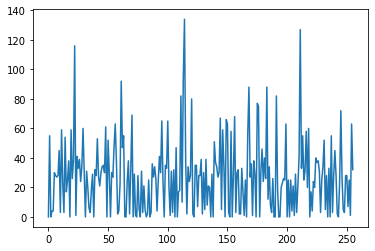

In [92]:
import matplotlib.pyplot as plt
plt.plot(fault_distribution)

In [ ]:
plt.plot(data_distribution_HW)